# <u>Diabetes Prediction Deep Learning Model</u>

In [2]:
# Importing dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


import warnings
warnings.filterwarnings('ignore')

#### Dataset Information 

# Diabetes _012_ Health Indicators BRFSS2015 Dataset

## Target Variable: `Diabetes_012`
- **0**: No diabetes or only during pregnancy.
- **1**: Prediabetes.
- **2**: Diabetes.

## Feature Variables (21 features)

1. **`HighBP` (High Blood Pressure status):**
   - **0**: No high blood pressure.
   - **1**: High blood pressure.

2. **`HighChol` (High Cholesterol status):**
   - **0**: No high cholesterol.
   - **1**: High cholesterol.

3. **`CholCheck` (Cholesterol checked status):**
   - **0**: Has not had cholesterol checked in the past 5 years.
   - **1**: Has had cholesterol checked in the past 5 years.

4. **`BMI` (Body Mass Index):**
   - Numeric value representing BMI (not categorized).

5. **`Smoker` (Smoking status):**
   - **0**: Non-smoker or has not smoked in the past 30 days.
   - **1**: Smoker (has smoked at least 100 cigarettes in their lifetime and currently smokes).

6. **`Stroke` (History of stroke):**
   - **0**: No history of stroke.
   - **1**: History of stroke.

7. **`HeartDiseaseorAttack` (History of heart disease or heart attack):**
   - **0**: No history of heart disease or heart attack.
   - **1**: History of heart disease or heart attack.

8. **`PhysActivity` (Physical activity level):**
   - **0**: No physical activity in the past 30 days.
   - **1**: Has engaged in physical activity in the past 30 days.

9. **`Fruits` (Fruit consumption):**
   - **0**: Does not consume fruits at least once per day.
   - **1**: Consumes fruits at least once per day.

10. **`Veggies` (Vegetable consumption):**
    - **0**: Does not consume vegetables at least once per day.
    - **1**: Consumes vegetables at least once per day.

11. **`HvyAlcoholConsump` (Heavy alcohol consumption):**
    - **0**: No heavy drinking (men ≤ 14 drinks/week, women ≤ 7 drink/week).
    - **1**: Heavy drinking (men > 14 drinks/week, women > 7 drink/week).

12. **`AnyHealthcare` (Access to healthcare):**             
    - Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc
      - - **0**: No access to healthcare.
      - - **1**: Has access to healthcare.

14. **`NoDocbcCost` (No doctor visits because of cost):**
    - **0**: Has not avoided doctor visits due to cost in the past 12 months.
    - **1**: Has avoided doctor visits due to cost in the past 12 months.

15. **`GenHlth` (General health status):**
    - **1**: Excellent.
    - **2**: Very good.
    - **3**: Good.
    - **4**: Fair.
    - **5**: Poor.

16. **`MentHlth` (Mental health status):**
    - Numeric value representing the number of days in the past 30 days mental health was not good (0-30).

17. **`PhysHlth` (Physical health status):**
    - Numeric value representing the number of days in the past 30 days physical health was not good (0-30).

18. **`DiffWalk` (Difficulty walking):**
    - **0**: No difficulty walking or climbing stairs.
    - **1**: Has difficulty walking or climbing stairs.

19. **`Sex` (Gender):**
    - **0**: Female.
    - **1**: Male.

20. **`Age` (Age group):**
    - **1**: 18-24 years.
    - **2**: 25-29 years.
    - **3**: 30-34 years.
    - **4**: 35-39 years.
    - **5**: 40-44 years.
    - **6**: 45-49 years.
    - **7**: 50-54 years.
    - **8**: 55-59 years.
    - **9**: 60-64 years.
    - **10**: 65-69 years.
    - **11**: 70-74 years.
    - **12**: 75-79 years.
    - **13**: 80 years or older.

21. **`Education` (Level of education):**
    - **1**: Never attended school or only kindergarten.
    - **2**: Grades 1 through 8 (Elementary).
    - **3**: Grades 9 through 11 (Some high school).
    - **4**: Grade 12 or GED (High school graduate).
    - **5**: College 1 year to 3 years (Some college or technical school).
    - **6**: College 4 years or more (College graduate).

20. **`Income` (Income level in doller):**
    - **1**: Less than 10,000.
    - **2**: 10,000 to less than 15,000.
    - **3**: 15,000 to less than 20,000.
    - **4**: 20,000 to less than 25,000.
    - **5**: 25,000 to less than 35,000.
    - **6**: 35,000 to less than 50,000.
    - **7**: 50,000 to less than 75,000.
    - **8**: 75,000 or more.

In [4]:
# Load Dataset
dir_path=r"C:\Users\ajitm\Data Science Cources\Deep Learning Projects\Diabetes-Prediction-Deep-Learning-Model\diabetes.csv"
df=pd.read_csv(dir_path)
pd.set_option('display.max_columns', None)
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
df.tail()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [6]:
df.shape

(253680, 22)

In [7]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [9]:
df.describe(include='all')

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [10]:
## Check Duplicates
print(f"Shape of dataset before removing duplicates: {df.shape}")
print(f"Number of Duplicates: {df.duplicated().sum()}")
# Remove duplicates
df.drop_duplicates(inplace=True)
# Print shape 
df_shape_after_dropduplicated=df.shape
print(f"Shape of dataset after removing duplicates: {df_shape_after_dropduplicated}")

Shape of dataset before removing duplicates: (253680, 22)
Number of Duplicates: 23899
Shape of dataset after removing duplicates: (229781, 22)


In [11]:
## Check Null
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

- Dataset does not have any nulls

In [13]:
## Check discrete and numericals variables
discreate_var=[col for col in df.columns if df[col].nunique()<=20]
print(f"Discreate Variables : {discreate_var}")
print('--'*50)
contineous_var=[col for col in df.columns if col not in discreate_var]
print(f" Contineous Variables : {contineous_var}")

Discreate Variables : ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
----------------------------------------------------------------------------------------------------
 Contineous Variables : ['BMI', 'MentHlth', 'PhysHlth']


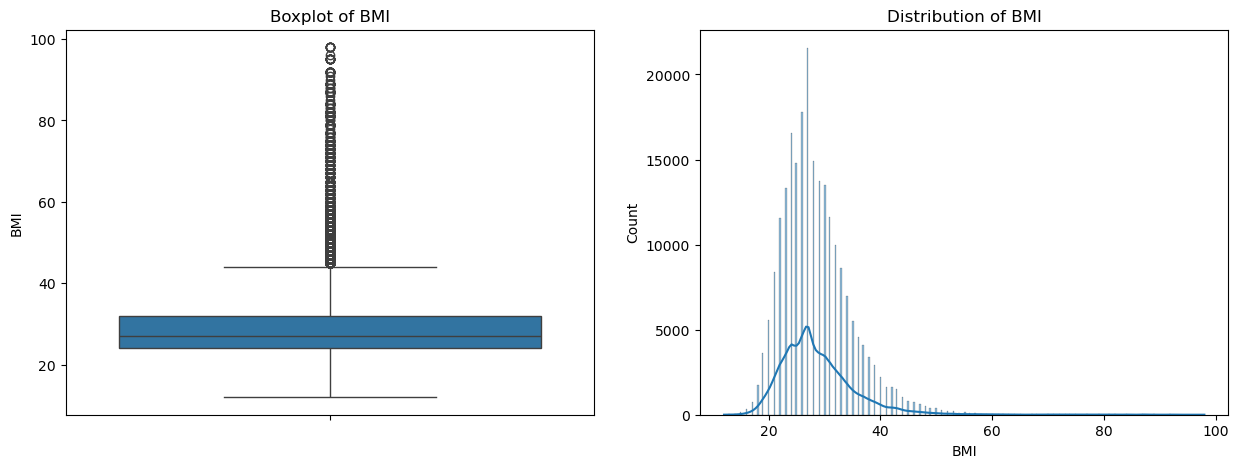

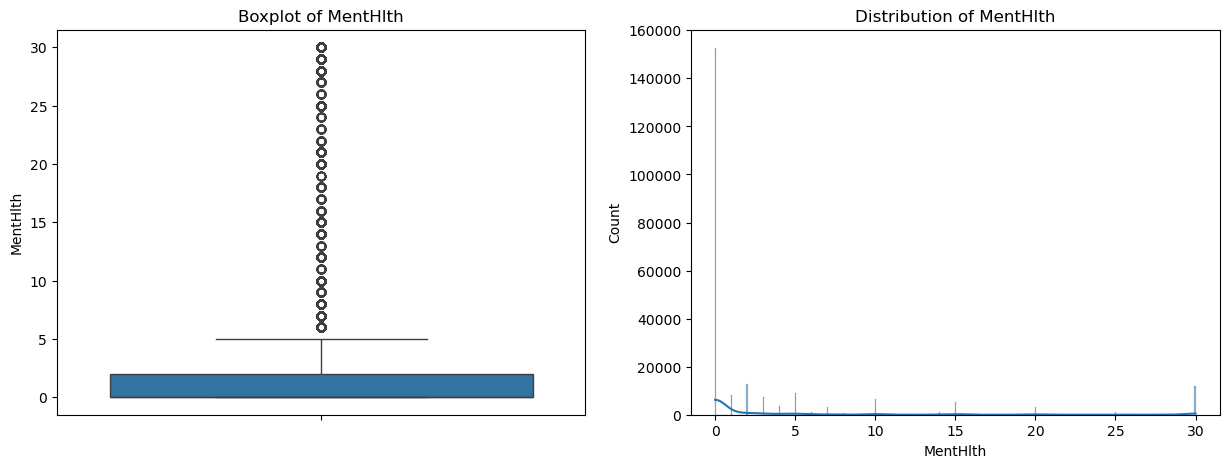

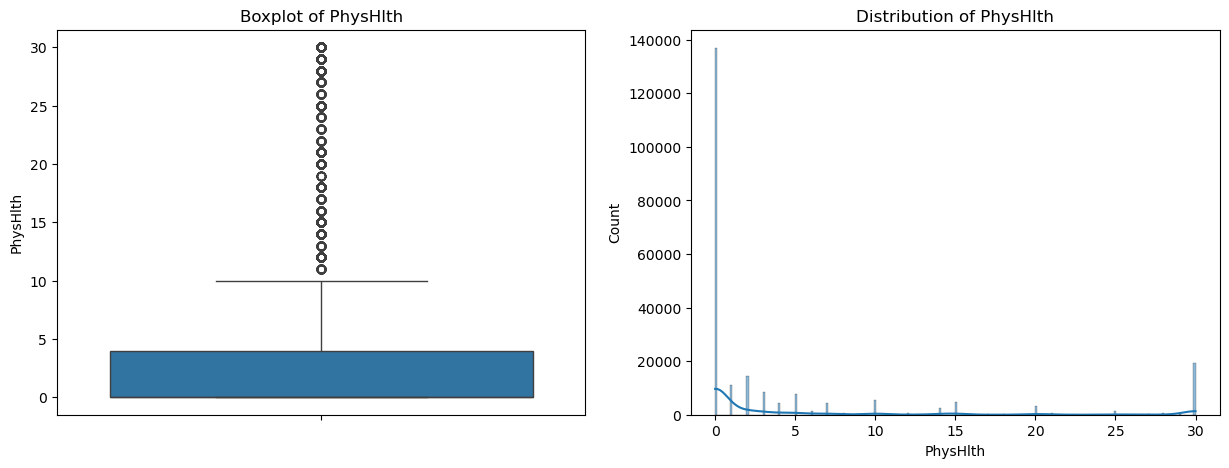

In [14]:
# Checking for outliers
for i in contineous_var:
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    # Boxplot for each feature
    sns.boxplot(df[i], ax=ax[0])
    ax[0].set_title(f'Boxplot of {i}')
    
    # Distribution plot (histogram) for each feature
    sns.histplot(df[i], kde=True, ax=ax[1])
    ax[1].set_title(f'Distribution of {i}')
    
    plt.show()

- **BMI**: Continuous variable with a normal distribution; outliers are identified and will removed using the Z-Score method.
- **MentHlth**: Continuous variable with a skewed distribution; extreme values reflecting significant mental health issues are retained.
- **PhysHlth**: Continuous variable with a skewed distribution; extreme values indicating severe physical health conditions are retained.

In [16]:
## Remove outlers from feature 'BMI' 
from scipy import stats

# Calculate z_score for BMI variable 
df['bmi_zscore']=stats.zscore(df['BMI'])

# Covert z_score to absolute value 
df['bmi_zscore']=np.abs(df['bmi_zscore'])

# threshould for outliser detection commanly 3 
threshould=3

# Filter out outliers based on zscore of BMI 
df=df[df['bmi_zscore']<threshould]

# Drop z_score column
df=df.drop(columns='bmi_zscore')

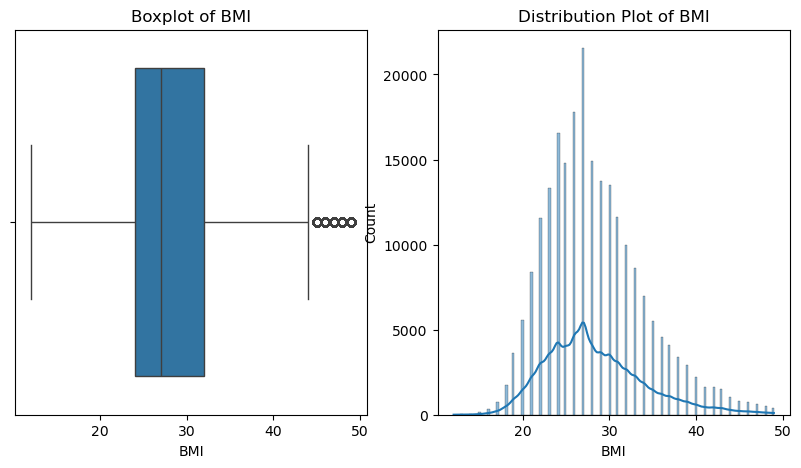

In [17]:
# Create subplots for boxplot and distribution plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Boxplot of BMI
sns.boxplot(x=df['BMI'], ax=ax[0])
ax[0].set_title("Boxplot of BMI")

# Distribution plot of BMI
sns.histplot(df['BMI'], kde=True, ax=ax[1])
ax[1].set_title("Distribution Plot of BMI")

plt.show()

- Outliers eliminated from feature BMI.

In [19]:
# Check shape of dataset
df_shape_after_dropoutlers=df.shape
print(f'Shape of Dataset after eliminating outliers:{df_shape_after_dropoutlers}')
# Count outlers
num_of_outlers=df_shape_after_dropduplicated[0]-df_shape_after_dropoutlers[0]
print(f"{num_of_outlers} outliers removed")

Shape of Dataset after eliminating outliers:(227234, 22)
2547 outliers removed
